In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import os
os.chdir(os.path.abspath(''))
print(os.getcwd())

c:\Users\vince\OneDrive\Bureau\Etudes_EPFL\Master_CSE\Master1\Semestre1\Machine_learning\Project2\spatial_data


In [79]:

# Assuming `matrix_pos` and `cell_density` are defined
# Example data for demonstration purposes:
# matrix_pos = np.random.rand(100, 2) * 10  # Random positions in a 10x10 area
# cell_density = np.random.rand(100, 1)     # Random density values
# Load data from CSV files
folder = r"data/"
df = pd.read_csv(folder + 'matrix_pos.csv')
df.head()


,X,Y
0,206.089813,1495.898193
1,201.765823,1816.210815
2,179.024506,2167.253906
3,186.060654,2163.309082
4,200.246887,2198.593506


In [60]:

cell_density = pd.read_csv(folder + 'cell_density.csv', index_col=0)  
cell_density.head()


,Value
0,0
1,406
2,418
3,439
4,488


In [61]:

cell_density_50 = pd.read_csv(folder + 'cell_density_50.csv', index_col=0)
cell_density_50.head()


,Value
0,0
1,50
2,65
3,70
4,62


In [62]:
print(np.max(cell_density.values), np.min(cell_density.values))
df['Density'] = cell_density.values
df.head()


1586 0


,X,Y,Density
0,206.089813,1495.898193,0
1,201.765823,1816.210815,406
2,179.024506,2167.253906,418
3,186.060654,2163.309082,439
4,200.246887,2198.593506,488


In [63]:
df_50= df.copy()
df_50['Density'] = cell_density_50.values
df_50.head()

,X,Y,Density
0,206.089813,1495.898193,0
1,201.765823,1816.210815,50
2,179.024506,2167.253906,65
3,186.060654,2163.309082,70
4,200.246887,2198.593506,62


In [68]:

df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')

# Define grid points for the heatmap
grid_x, grid_y = np.mgrid[
    df['X'].min():df['X'].max():1000j, 
    df['Y'].min():df['Y'].max():1000j
]

# Interpolate the data to fit the grid
grid_z = griddata(
    points=df[['X', 'Y']].values, values=df['Density'].values, 
    xi=(grid_x, grid_y), method='cubic'
)
grid_z = np.ma.masked_invalid(grid_z)
grid_z_masked = np.ma.masked_less(grid_z, 0)


In [128]:
df_50['X'] = pd.to_numeric(df_50['X'], errors='coerce')
df_50['Y'] = pd.to_numeric(df_50['Y'], errors='coerce')

# Define grid points for the heatmap
grid_x_50, grid_y_50 = np.mgrid[
    df_50['X'].min():df_50['X'].max():1000j, 
    df_50['Y'].min():df_50['Y'].max():1000j
]

# Interpolate the data to fit the grid
grid_z_50 = griddata(
    points=df_50[['X', 'Y']].values, values=df_50['Density'].values, 
    xi=(grid_x, grid_y), method='cubic'
)
grid_z_50 = np.ma.masked_invalid(grid_z_50)
grid_z_masked_50 = np.ma.masked_less(grid_z_50, 0)

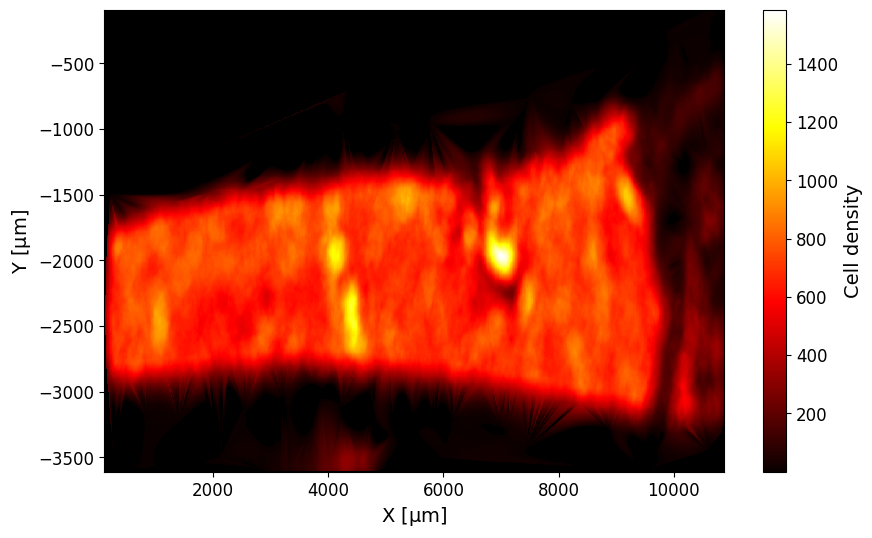

In [70]:

# Plot the heatmap
plt.figure(figsize=(10, 6))
ax= plt.gca()
heatmap = plt.pcolormesh(grid_x, -grid_y, grid_z_masked, shading='auto', cmap='hot')
ax.set_facecolor('black')
cbar = plt.colorbar(heatmap)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='Cell density', fontsize = 14)
ax.set_xlabel(r"X [$\mathrm{\mu m}$]", fontsize= 14)
ax.set_ylabel(r"Y [$\mathrm{\mu m}$]", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.savefig(r"C:\Users\vince\OneDrive\Bureau\Etudes_EPFL\Master_CSE\Master1\Semestre1\Machine_learning\Project2\Figures\heatmap_density.png", format = 'png')
plt.show()


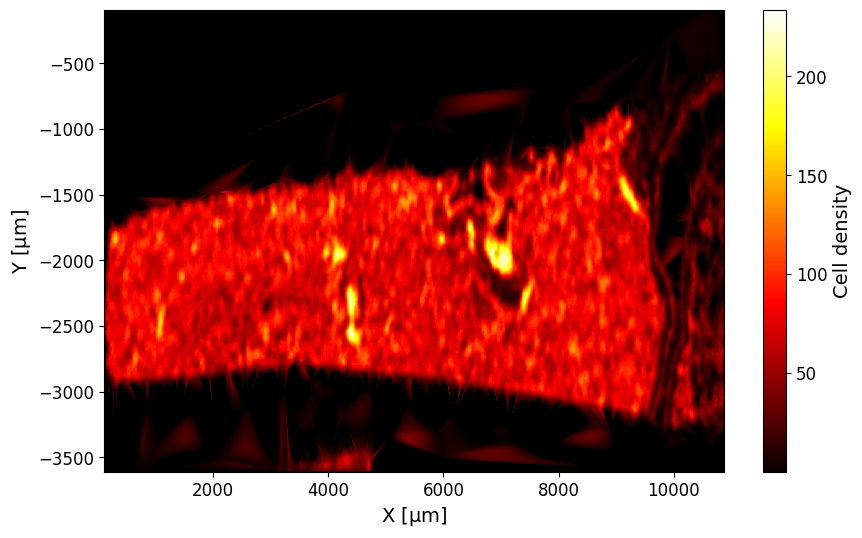

In [78]:

# Plot the heatmap
plt.figure(figsize=(10, 6))
ax= plt.gca()
heatmap = plt.pcolormesh(grid_x_50, -grid_y_50, grid_z_masked_50, shading='auto', cmap='hot')
ax.set_facecolor('black')
cbar = plt.colorbar(heatmap)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='Cell density', fontsize = 14)
ax.set_xlabel(r"X [$\mathrm{\mu m}$]", fontsize= 14)
ax.set_ylabel(r"Y [$\mathrm{\mu m}$]", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig(r"C:\Users\vince\OneDrive\Bureau\Etudes_EPFL\Master_CSE\Master1\Semestre1\Machine_learning\Project2\Figures\heatmap_density_50.eps", format = 'eps', bbox_inches='tight')
plt.show()

In [176]:
folder_predictions = "predictions/"
df_pred= pd.read_csv(folder_predictions + "predictions_first_attempt.csv", index_col= None)
df_pred.head()

,cells_id,prediction,true_values
0,aaaaficg-1,88.5,50
1,aaabbaka-1,81.7,65
2,aaabbjoo-1,83.3,70
3,aaablchg-1,83.6,62
4,aaacaicl-1,71.2,73


In [177]:
folder_xenium = r"C:\Users\vince\OneDrive\Bureau\Etudes_EPFL\Master_CSE\Master1\Semestre1\Machine_learning\Project2\spatial_data\Xenium_V1_humanLung_Cancer_FFPE_outs"
df_cells= pd.read_csv(folder_xenium + "\cells.csv.gz")
df_cells.head()

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area
0,aaaadpbp-1,206.089813,1495.898193,0,0,0,0,0,0,68.456877,NaN
1,aaaaficg-1,201.765823,1816.210815,19,0,0,0,0,19,49.130002,21.268595
2,aaabbaka-1,179.024506,2167.253906,53,0,0,0,0,53,119.618911,74.778753
3,aaabbjoo-1,186.060654,2163.309082,29,0,0,0,0,29,94.241097,59.109533
4,aaablchg-1,200.246887,2198.593506,42,0,0,1,0,43,120.341411,52.426408


In [178]:
df_pred = df_pred.merge(df_cells[['cell_id', 'x_centroid', 'y_centroid']], how= 'left', left_on= 'cells_id', right_on= 'cell_id')
df_pred.head()

,cells_id,prediction,true_values,cell_id,x_centroid,y_centroid
0,aaaaficg-1,88.5,50,aaaaficg-1,201.765823,1816.210815
1,aaabbaka-1,81.7,65,aaabbaka-1,179.024506,2167.253906
2,aaabbjoo-1,83.3,70,aaabbjoo-1,186.060654,2163.309082
3,aaablchg-1,83.6,62,aaablchg-1,200.246887,2198.593506
4,aaacaicl-1,71.2,73,aaacaicl-1,196.527405,2270.769287


In [ ]:
df_pred['X'] = df_pred['x_centroid']
df_pred['Y'] = df_pred['y_centroid']
df_pred['Density'] = df_pred['prediction']
print(df_pred.shape)
df_pred.head()


(161993, 9)


,cells_id,prediction,true_values,cell_id,x_centroid,y_centroid,X,Y,Density
0,aaaaficg-1,88.5,50,aaaaficg-1,201.765823,1816.210815,201.765823,1816.210815,88.5
1,aaabbaka-1,81.7,65,aaabbaka-1,179.024506,2167.253906,179.024506,2167.253906,81.7
2,aaabbjoo-1,83.3,70,aaabbjoo-1,186.060654,2163.309082,186.060654,2163.309082,83.3
3,aaablchg-1,83.6,62,aaablchg-1,200.246887,2198.593506,200.246887,2198.593506,83.6
4,aaacaicl-1,71.2,73,aaacaicl-1,196.527405,2270.769287,196.527405,2270.769287,71.2


In [188]:
vmin = 0
vmax = np.max(df_50['Density'].values)

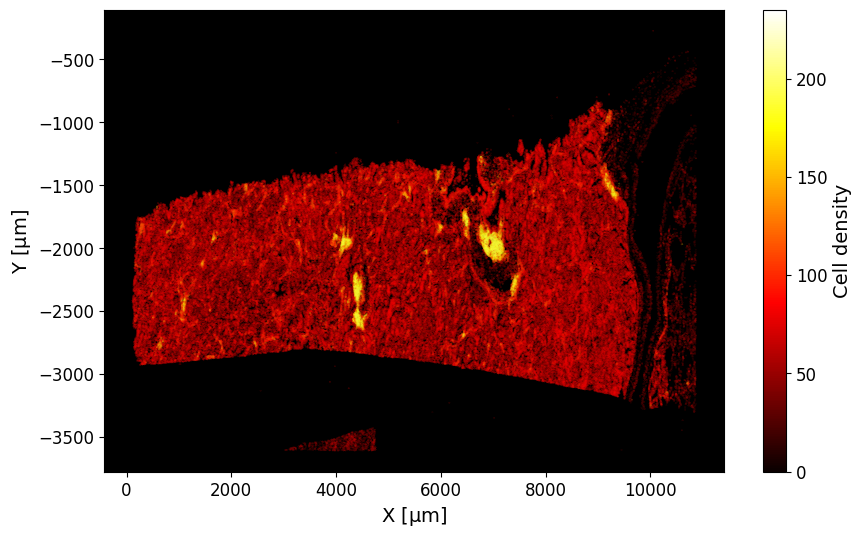

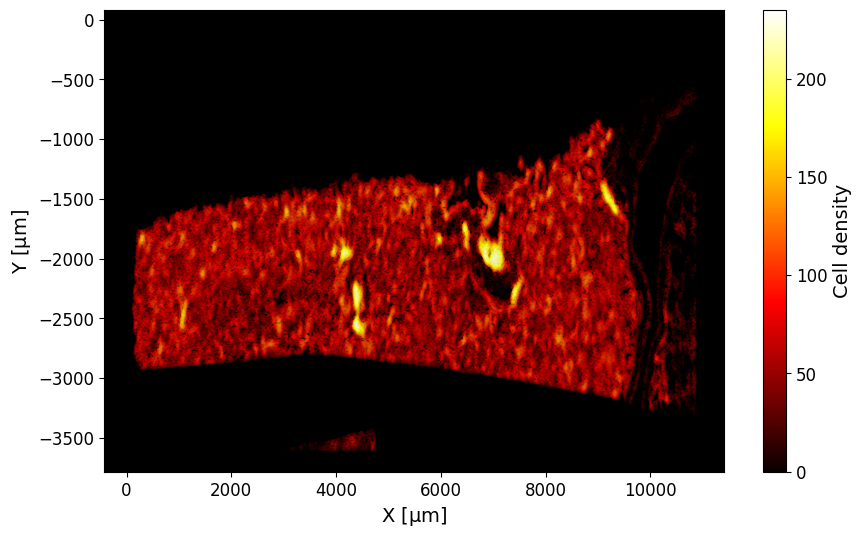

In [190]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
ax= plt.gca()
#heatmap = plt.pcolormesh(grid_x_pred, -grid_y_pred, grid_z_masked_pred, shading='auto', cmap='hot')
heatmap = plt.hexbin(df_pred['X'], -df_pred['Y'], C=df_pred['Density'], vmin= vmin, vmax= vmax, gridsize=5000, reduce_C_function=np.mean, cmap='hot')
ax.set_facecolor('black')
cbar = plt.colorbar(heatmap)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='Cell density', fontsize = 14)
ax.set_xlabel(r"X [$\mathrm{\mu m}$]", fontsize= 14)
ax.set_ylabel(r"Y [$\mathrm{\mu m}$]", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig(r"C:\Users\vince\OneDrive\Bureau\Etudes_EPFL\Master_CSE\Master1\Semestre1\Machine_learning\Project2\Figures\heatmap_first_pred.eps", format = 'eps', bbox_inches='tight')


plt.figure(figsize=(10, 6))
ax= plt.gca()
#heatmap = plt.pcolormesh(grid_x_50, -grid_y_50, grid_z_masked_50, shading='auto', cmap='hot')
heatmap = plt.hexbin(df_50['X'], -df_50['Y'], C=df_50['Density'], vmin= vmin, vmax= vmax, gridsize=5000, reduce_C_function=np.mean, cmap='hot')
ax.set_facecolor('black')
cbar = plt.colorbar(heatmap)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='Cell density', fontsize = 14)
ax.set_xlabel(r"X [$\mathrm{\mu m}$]", fontsize= 14)
ax.set_ylabel(r"Y [$\mathrm{\mu m}$]", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.savefig(r"C:\Users\vince\OneDrive\Bureau\Etudes_EPFL\Master_CSE\Master1\Semestre1\Machine_learning\Project2\Figures\heatmap_density_50.eps", format = 'eps', bbox_inches='tight')
plt.show()

In [187]:
print(df_50[df_50['Density'] >= 200])

                  X            Y  Density
17362   9185.372070  1484.479980      200
17364   9186.722656  1472.595825      201
17368   9187.391602  1478.931030      204
23525   6902.357910  2006.630493      205
23912   6846.239258  1969.006958      216
...             ...          ...      ...
155564  4367.662109  2299.926270      211
155565  4366.461426  2304.987549      202
161768  4179.680176  1968.281250      209
162159  4368.955078  2573.275146      206
162161  4372.030273  2562.720459      223

[1121 rows x 3 columns]
